<a href="https://colab.research.google.com/github/SakshiTalreja/Stock-Market-Prediction/blob/main/31_07_2021_TCS_NS_Ensemble_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score 
from sklearn.model_selection import KFold  

In [ ]:
df = pd.read_csv('TCS.NS.csv')
# user_y = input("What you want to predict?\n1. Open\n2. High\n3. Low\n4. Close\n5. RSI(Buy/Sell)\nInput: ")
# y = df.loc[:,user_y]
x = df[['Sno','Open','Close', 'SMA Open', 'SMA Close', 'RS']]  
y = df[['High', 'Low', 'RSI']]
train_accuracy = []
test_accuracy = []
train_rsme = []
test_rsme = []
kfolds = []
kfold_accuracy = []

In [ ]:
def accuracy_score(y_train, y_pred_train, y_test, y_pred_test):
  print("Accuracy in Training: ", r2_score(y_train, y_pred_train)*100)
  train_accuracy.append(r2_score(y_train, y_pred_train)*100)
  print("Accuracy in Testing: ", r2_score(y_test, y_pred_test)*100)
  test_accuracy.append(r2_score(y_test, y_pred_test)*100)

In [ ]:
def rsme(y_train, y_pred_train, y_test, y_pred_test):
  rsme_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rsme_train = mean_squared_error(y_train, y_pred_train, squared=False)
  train_rsme.append(rsme_train)
  test_rsme.append(rsme_test)
  print("RSME Train: ", rsme_train)
  print("RSME Test: ", rsme_test)

In [ ]:
def k_fold(algo, x, y, cv):
  kf = KFold(n_splits=cv, random_state=None) 
  kfolds.append(cv)
  scores = []
  model = algo
  for train_index, test_index in kf.split(x):
    X_train, X_test, Y_train, Y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train) 
    scores.append(r2_score(Y_train, Y_pred_train))
  print("Accuracy: {}".format(np.mean(scores)*100)) 
  kfold_accuracy.append(np.mean(scores)*100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(x_train, y_train)
y_pred_train_knn = knn_model.predict(x_train)
y_pred_test_knn = knn_model.predict(x_test)
accuracy_score(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

Accuracy in Training:  93.40295538407167
Accuracy in Testing:  89.97607401635844


In [ ]:
rsme(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

RSME Train:  19.632393365037217
RSME Test:  18.994418240666672


In [ ]:
k_fold(KNeighborsRegressor(), x, y, 10) 

Accuracy: 95.36968670162857


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
rf_model.fit(x_train, y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)
accuracy_score(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

Accuracy in Training:  99.10069711497317
Accuracy in Testing:  93.72463499395556


In [ ]:
rsme(y_train, y_pred_train_rf, y_test, y_pred_test_rf) 

RSME Train:  6.490097610873037
RSME Test:  15.330465204150137


In [ ]:
k_fold(RandomForestRegressor(), x, y, 10)

Accuracy: 99.19982324926737


SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler().fit_transform(x)
sc_y = StandardScaler().fit_transform(y) 
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(sc_x, sc_y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_sc, y_train_sc[:,0])
y_pred_train_svr = svr_model.predict(x_train)
y_pred_test_svr = svr_model.predict(x_test) 
accuracy_score(y_train_sc[:, 0], y_pred_train_svr, y_test_sc[:, 0], y_pred_test_svr)

Accuracy in Training:  -8.941379196377298
Accuracy in Testing:  -12.213403520218113


In [ ]:
rsme(y_train_sc[:, 0], y_pred_train_svr, y_test_sc[:, 0], y_pred_test_svr) 

RSME Train:  1.0291744113789416
RSME Test:  1.0909951232586892


In [ ]:
k_fold(SVR(), x, y.iloc[:, 0], 5)                      

Accuracy: 0.6942785701179077


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(solver='liblinear')
lgr_model.fit(x_train, y_train.iloc[:, 0].astype('int'))
y_pred_train_lgr = lgr_model.predict(x_train)
y_pred_test_lgr = lgr_model.predict(x_test)
accuracy_score(y_train.iloc[:,0].astype('int'), y_pred_train_lgr, y_test.iloc[:,0].astype('int'), y_pred_test_lgr)

Accuracy in Training:  88.16897830599304
Accuracy in Testing:  73.86424960573014


In [ ]:
rsme(y_train.iloc[:,0].astype('int'), y_pred_train_lgr, y_test.iloc[:,0].astype('int'), y_pred_test_lgr)

RSME Train:  107.72197797978508
RSME Test:  167.2379598394683


In [ ]:
k_fold(LogisticRegression(solver='liblinear'), x, y.iloc[:, 0].astype('int'), 5)

Accuracy: 88.85154107865458


Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr = lr_model.predict(x_test)
accuracy_score(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

Accuracy in Training:  96.9882239291464
Accuracy in Testing:  97.31434429554318


In [ ]:
rsme(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

RSME Train:  13.36164398890623
RSME Test:  11.933378809956613


In [ ]:
k_fold(LinearRegression(), x, y, 10)

Accuracy: 97.15366052545819


Algorithms Analysis


In [ ]:
df_algo = pd.DataFrame({'Algorithm': ['KNN', 'Random Forest', 'SVR', 'Logistic', 'Multiple Linear'], 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Train RMSE': train_rsme, 'Test RMSE': test_rsme, 'KFold': kfolds, 'Kfold Accuracy': kfold_accuracy})
df_algo.set_index('Algorithm', inplace=True)
print(df_algo)

                 Train Accuracy  Test Accuracy  ...  KFold  Kfold Accuracy
Algorithm                                       ...                       
KNN                   93.402955      89.976074  ...     10       95.369687
Random Forest         99.100697      93.724635  ...     10       99.199823
SVR                   -8.941379     -12.213404  ...      5        0.694279
Logistic              88.168978      73.864250  ...      5       88.851541
Multiple Linear       96.988224      97.314344  ...     10       97.153661

[5 rows x 6 columns]


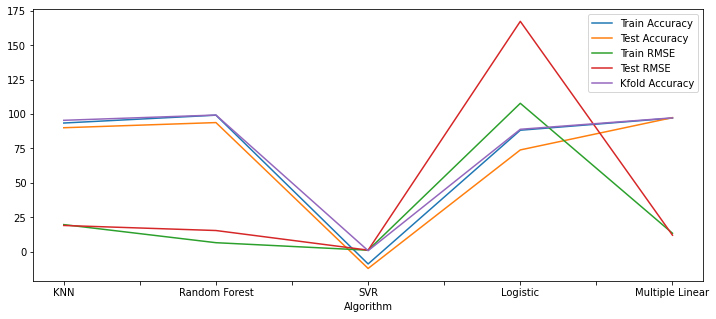

In [ ]:
df_algo[['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Kfold Accuracy']].plot(subplots=False,figsize=(12,5))

In [ ]:
df_model_best = df_algo.loc[((df_algo['Test Accuracy']>80) & (df_algo['Train Accuracy']>80)), ['Train Accuracy', 'Test Accuracy', 'Kfold Accuracy']]
print(df_model_best)

                 Train Accuracy  Test Accuracy  Kfold Accuracy
Algorithm                                                     
KNN                   93.402955      89.976074       95.369687
Random Forest         99.100697      93.724635       99.199823
Multiple Linear       96.988224      97.314344       97.153661


In [ ]:
df_compare_knn = pd.DataFrame({'Y test RSI': y_test['RSI'], 'Y pred RSI': y_pred_test_knn[:, 2]})
df_compare_rf = pd.DataFrame({'Y test RSI': y_test['RSI'], 'Y pred RSI': y_pred_test_rf[:, 2]})
df_compare_mlr = pd.DataFrame({'Y test RSI': y_test['RSI'], 'Y pred RSI': y_pred_test_lr[:, 2]})
print(df_compare_knn.iat[0,0])
print(df_compare_knn)

48.53708227
     Y test RSI  Y pred RSI
221   48.537082   53.096988
101   71.748946   66.291558
213   76.980865   67.040529
190   57.669766   47.056507
137   32.695044   36.450099
..          ...         ...
184   41.473099   43.247975
61    46.685536   49.016094
110   77.480932   71.832061
52    22.647849   40.033268
66    50.530198   45.279376

[71 rows x 2 columns]


In [ ]:
sb_knn_pred = []
i = 0
while i<len(df_compare_knn):
  if df_compare_knn.iat[i, 1]<30:
    sb_knn_pred.append("Buy")
  elif df_compare_knn.iat[i, 1]>70:
    sb_knn_pred.append("Sell")
  else:
    sb_knn_pred.append("Hold")
  i=i+1

In [ ]:
sb_rf_pred = []
j = 0
while j<len(df_compare_rf):
  if df_compare_rf.iat[j, 1]<30:
    sb_rf_pred.append("Buy")
  elif df_compare_rf.iat[j, 1]>70:
    sb_rf_pred.append("Sell")
  else:
    sb_rf_pred.append("Hold")
  j=j+1

In [ ]:
sb_mlr_pred = []
k = 0
while k<len(df_compare_mlr):
  if df_compare_mlr.iat[k, 1]<30:
    sb_mlr_pred.append("Buy")
  elif df_compare_mlr.iat[k, 1]>70:
    sb_mlr_pred.append("Sell")
  else:
    sb_mlr_pred.append("Hold")
  k=k+1

In [ ]:
sb_pred_df = pd.DataFrame({'KNN': sb_knn_pred, 'RF': sb_rf_pred, 'MLR': sb_mlr_pred})
sb_pred = []
l = 0
while l<len(sb_pred_df):
  if sb_pred_df.iat[l, 0]==sb_pred_df.iat[l, 1]:
    sb_pred.append(sb_pred_df.iat[l, 0])
  elif sb_pred_df.iat[l, 1]==sb_pred_df.iat[l, 2]:
    sb_pred.append(sb_pred_df.iat[l, 1])
  elif sb_pred_df.iat[l, 0]==sb_pred_df.iat[l, 2]:
    sb_pred.append(sb_pred_df.iat[l, 0])
  l=l+1

In [ ]:
sb_actual = []
m = 0
while m<len(df_compare_knn):
  if df_compare_knn.iat[m, 0]<30:
    sb_actual.append("Buy")
  elif df_compare_knn.iat[m, 0]>70:
    sb_actual.append("Sell")
  else:
    sb_actual.append("Hold")
  m=m+1

In [ ]:
final_df_compare = pd.DataFrame({'Actual': sb_actual, 'KNN': sb_knn_pred, 'RF': sb_rf_pred, 'MLR': sb_mlr_pred, 'Predicted': sb_pred})
print(final_df_compare.head(50))

   Actual   KNN    RF   MLR Predicted
0    Hold  Hold  Hold  Hold      Hold
1    Sell  Hold  Hold  Sell      Hold
2    Sell  Hold  Sell  Sell      Sell
3    Hold  Hold  Hold  Hold      Hold
4    Hold  Hold  Hold  Hold      Hold
5    Hold  Hold  Hold  Hold      Hold
6    Hold  Hold  Hold  Hold      Hold
7    Sell  Sell  Sell  Sell      Sell
8    Hold  Hold  Hold  Hold      Hold
9    Sell  Hold  Hold  Sell      Hold
10   Hold  Hold  Hold  Hold      Hold
11   Sell  Hold  Hold  Hold      Hold
12    Buy  Hold  Hold   Buy      Hold
13   Hold  Hold  Hold  Hold      Hold
14   Sell  Hold  Hold  Sell      Hold
15    Buy  Hold  Hold  Hold      Hold
16   Hold  Hold  Hold  Hold      Hold
17   Hold  Sell  Hold  Hold      Hold
18   Hold  Hold  Hold  Hold      Hold
19   Hold  Hold  Hold  Hold      Hold
20   Hold  Hold  Hold  Hold      Hold
21   Sell  Hold  Sell  Sell      Sell
22   Hold  Sell  Sell  Sell      Sell
23   Sell  Sell  Hold  Sell      Sell
24   Hold  Hold  Hold  Hold      Hold
25   Hold  H